In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline 

In [2]:
import glob
def textfile(d):
    files = glob.glob(d)
    return files
textfile1=textfile("./letterto shareholders1/*.txt")
textfile2=textfile("./letterto shareholders2/*.txt")

In [3]:
jieba.load_userdict('worddict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zz/bqrx4v8s4cq4vszqlfzpp6_40000gn/T/jieba.cache
Loading model cost 0.649 seconds.
Prefix dict has been built succesfully.


In [4]:
stop = open('stopwordsforkmeans.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.
def wordlist(textfile):
    corpus = []
    jieba.load_userdict('dict.txt')
    for t in textfile:
        f = open(t,'r', encoding ="utf-8")
        r = f.read()
        remove_digits = str.maketrans('', '', digits)
        r = r.translate(remove_digits)
        r_list = jieba.cut(r, cut_all=False)
        r_list = list(r_list)
        for i in range(5):
            for w in r_list:
                if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                    r_list.remove(w)        
        st=" ".join(r_list)
    #     corpus[st]
        corpus.append(st)
    return corpus

In [6]:
w1=wordlist(textfile1)
w2=wordlist(textfile2)

In [7]:
w=w1+w2
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(w)
words = vectorizer.get_feature_names()
X = tfidf.toarray()
X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [8]:
Y_sklearn

array([[ -4.75071716,  -7.71801479],
       [ -5.01213486, -10.2982842 ],
       [ -5.28198628,  -4.01825378],
       [-12.06529014,  38.55925275],
       [ 57.33395028,   8.50186905],
       [ -5.15259942,  -3.89605321],
       [ -5.55670007,  -4.02543838],
       [-14.88980608,  49.60168832],
       [-14.64710872,  47.19532551],
       [ 58.64994833,   7.04631318],
       [ 72.51601791,  11.58535628],
       [ -4.45605324,  -6.91025938],
       [ -5.55372882, -12.94389964],
       [ -4.06560563,  -8.82368349],
       [ -3.41456532,  -6.20479006],
       [ -4.50725088,  -8.1485226 ],
       [ -4.37090303,  -9.6363115 ],
       [ -3.34821878,  -8.4518002 ],
       [ -4.82001829,  -8.55351171],
       [ 49.56961082,   6.36031022],
       [ 44.79605278,   4.49461226],
       [ -5.3969054 ,  -3.83612575],
       [ -4.39702796,  -4.0387232 ],
       [-15.71435976,  53.74332512],
       [-16.44035767,  56.98314725],
       [ -4.32379012, -11.40701488],
       [ -4.63487541, -10.7200968 ],
 

In [9]:
len(w1)

25

In [10]:
len(w2)

25

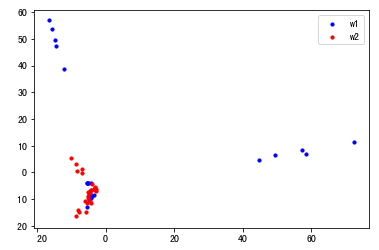

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x = Y_sklearn[:len(w1),0], y = Y_sklearn[:len(w1),1], s=10, c='b', label='w1')
ax1.scatter(x = Y_sklearn[len(w1):,0], y = Y_sklearn[len(w1):,1], s=10, c='r', label='w2')
plt.legend(loc='best');
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)
X_clustered

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

No handles with labels found to put in legend.


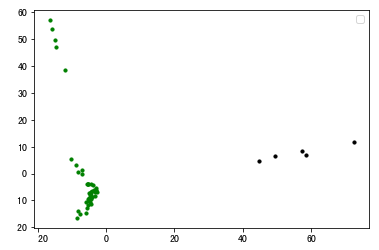

In [13]:
kmeans1position=[i for i,x in enumerate(X_clustered) if x == 0]
kmeans2position=[i for i,x in enumerate(X_clustered) if x == 1]
kmeans1=[]
kmeans2=[]
for i in kmeans1position:
    kmeans1.append(Y_sklearn[i].tolist())
for i in kmeans2position:
    kmeans2.append(Y_sklearn[i].tolist())
kmeans1=np.asarray(kmeans1)
kmeans2=np.asarray(kmeans2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x = kmeans1[:,0], y = kmeans1[:,1], s=10, c='black')
ax1.scatter(x = kmeans2[:,0], y = kmeans2[:,1], s=10, c='green')
plt.legend(loc='best');
plt.show()

In [14]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='LiangPeiJu', api_key='AAINuB71QEI9chxuV016')

In [15]:
pca_data1 = go.Scatter(
        x = Y_sklearn[:len(w1),0],
        y = Y_sklearn[:len(w1),1],
        name = 'pca_data1',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile1
    )

pca_data2 = go.Scatter(
        x = Y_sklearn[len(w1):,0],
        y = Y_sklearn[len(w1):,1],
        name = 'pca_data2',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile2
    )
data = [pca_data1,pca_data2]
py.iplot(data, filename = 'PCA Scatter Chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~LiangPeiJu/0 or inside your plot.ly account where it is named 'PCA Scatter Chart'


In [16]:
kmeans_data1 = go.Scatter(
        x = kmeans1[:,0],
        y = kmeans1[:,1],
        name = 'kmeans_data1',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile1
    )

kmeans_data2 = go.Scatter(
        x = kmeans2[:,0],
        y = kmeans2[:,1],
        name = 'kmeans_data2',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile2
    )
data = [kmeans_data1,kmeans_data2]
py.iplot(data, filename = 'kmeans Scatter Chart')